## Train

In [2]:
import subprocess
c = 10
for i in range(1,c+1):
    !python clean.py
    !python data/split_train_and_test.py
    !python data/create_empty_db.py
    !python data/insert_values_to_db.py
    !python data/insert_standard_to_db.py
    !python data/data_to_npz.py
    subprocess.call("python train.py " + str(i))
    print("OK!",i)

OK! 1
OK! 2
OK! 3
OK! 4
OK! 5
OK! 6
OK! 7
OK! 8
OK! 9
OK! 10


In [3]:
!python clean.py

In [1]:
!python DataCollecting/data_tokenize.py

## Analyze

In [4]:
import csv
def get_parties():
    parties = []
    with open("DataCollecting/Politicians.csv","r") as f:
        data = csv.DictReader(f)
        for row in data:
            parties.append(row["party_name"])
    return parties

Average Accuracy: 0.7785511363636364


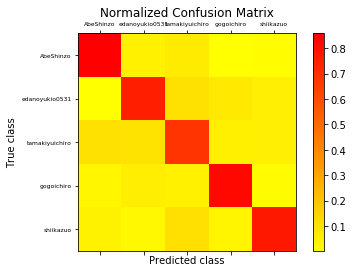

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


politicians = get_parties()

i = 10

accuracies = []
with open("result/accuracy.txt","r") as f:
    for l in f.readlines():
        accuracies.append(float(l))
print("Average Accuracy:",np.mean(accuracies))
        

cm = []
for i in range(1, i+1):
    cm.append(np.load("result/cm{0}.npy".format(i)))
cm = np.asarray(cm)
cm_a = np.mean(cm,axis=0)

fig = plt.figure()
ax = plt.subplot()
cax = ax.matshow(cm_a, interpolation="nearest", cmap="autumn_r")
fig.colorbar(cax)
ax.set_xticklabels([""]+politicians,fontsize=6)
ax.set_yticklabels([""]+politicians,fontsize=6)
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()

with open("result/cm.csv","w") as f:
    writer = csv.writer(f,delimiter=",")
    writer.writerows(cm_a)